#**MLP - Multilayer Perceptron**

**Aluno:** Pedro Victor Andrade Alves

**Matrícula:** 20190001079


# **MLP usando dataset do Kaggle**

* **Classificação**
* **Identificar se um determinado paciente, com doença cardiovascular, morreu ou não** 

Fonte: [https://www.kaggle.com/andrewmvd/heart-failure-clinical-data](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

## Carregando os Dados

In [21]:
!pip install kaggle

In [22]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"pedrovictor046","key":"2e00fbdcda5c072635f4e4e28f301f55"}'}

In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
from zipfile import ZipFile
file_name = "heart-failure-clinical-data.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [26]:
import pandas as pd

dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Escolhendo atributos 
* Diabetes e pressão alta

In [121]:
X = dataset.loc[:,['age','high_blood_pressure']].values
y = dataset['DEATH_EVENT'].values

print(X[0:6,:])

[[75.  1.]
 [55.  0.]
 [65.  0.]
 [50.  0.]
 [65.  0.]
 [90.  1.]]


## Separando entre conjuntos de treinamento e teste

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Normalização 

In [123]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Treinamento

In [124]:
import tensorflow as tf

### Construíndo a estrutra da rede 
* Arquitetura 

In [125]:
# Inicialização 
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida  
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))

# Adicionando a camada de saída 
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [126]:
# Montando a Rede 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Executando o treinamento 

In [127]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 120)

Epoch 1/120
224/224 [==============================] - 0s 815us/step - loss: 0.6899 - accuracy: 0.6054
Epoch 2/120
224/224 [==============================] - 0s 835us/step - loss: 0.6717 - accuracy: 0.7009
Epoch 3/120
224/224 [==============================] - 0s 885us/step - loss: 0.6667 - accuracy: 0.6392
Epoch 4/120
224/224 [==============================] - 0s 837us/step - loss: 0.6378 - accuracy: 0.7015
Epoch 5/120
224/224 [==============================] - 0s 823us/step - loss: 0.6221 - accuracy: 0.7247
Epoch 6/120
224/224 [==============================] - 0s 817us/step - loss: 0.6511 - accuracy: 0.6516
Epoch 7/120
224/224 [==============================] - 0s 823us/step - loss: 0.6288 - accuracy: 0.6956
Epoch 8/120
224/224 [==============================] - 0s 990us/step - loss: 0.6149 - accuracy: 0.7075
Epoch 9/120
224/224 [==============================] - 0s 896us/step - loss: 0.6189 - accuracy: 0.6987
Epoch 10/120
224/224 [==============================] - 0s 869us/step - l

## Avaliando do Modelo (Métrica)

In [128]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
[[0.14012724]
 [0.31579953]
 [0.16587746]
 [0.2620766 ]
 [0.3872107 ]
 [0.33397347]
 [0.33397347]
 [0.20038095]
 [0.2846557 ]
 [0.31372657]
 [0.41543153]
 [0.523948  ]
 [0.26620364]
 [0.23999637]
 [0.39316148]
 [0.37629703]
 [0.14012724]
 [0.3872107 ]
 [0.2620766 ]
 [0.23614487]
 [0.5008448 ]
 [0.14756092]
 [0.2846557 ]
 [0.22353464]
 [0.42059708]
 [0.3091732 ]
 [0.18277857]
 [0.23999637]
 [0.3292672 ]
 [0.22353464]
 [0.14756092]
 [0.14756092]
 [0.33397347]
 [0.2846557 ]
 [0.25323242]]


In [129]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [130]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)

In [131]:
print(y_test[0:35])
print(y_pred_bin[0:35])

[0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [132]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  65.33333333333333 %


In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[45  3]
 [23  4]]


## Visualizando os resultados

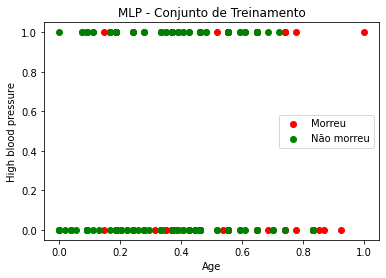

In [135]:
import matplotlib.pyplot as plt

Age_neg = X_train[y_train == 0, 0]
High_blood_pressure_neg = X_train[y_train == 0, 1]
Age_pos = X_train[y_train == 1, 0]
High_blood_pressure_pos = X_train[y_train == 1, 1]

plt.scatter(Age_pos,High_blood_pressure_pos, color='red', label = 'Morreu')
plt.scatter(Age_neg,High_blood_pressure_neg, color='green', label = 'Não morreu')

plt.title('MLP - Conjunto de Treinamento')
plt.xlabel('Age')
plt.ylabel('High blood pressure')
plt.legend()
plt.show()

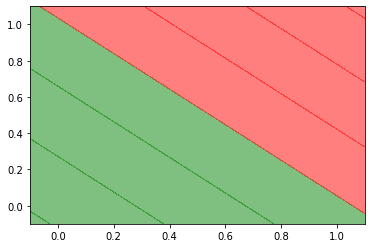

In [104]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

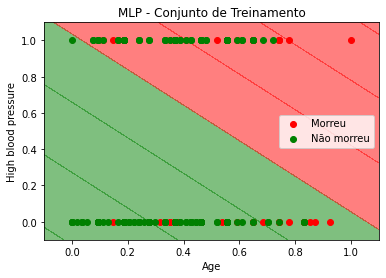

In [136]:
Age_neg = X_train[y_train == 0, 0]
High_blood_pressure_neg = X_train[y_train == 0, 1]
Age_pos = X_train[y_train == 1, 0]
High_blood_pressure_pos = X_train[y_train == 1, 1]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

plt.scatter(Age_pos,High_blood_pressure_pos, color='red', label = 'Morreu')
plt.scatter(Age_neg,High_blood_pressure_neg, color='green', label = 'Não morreu')

plt.title('MLP - Conjunto de Treinamento')
plt.xlabel('Age')
plt.ylabel('High blood pressure')
plt.legend()
plt.show()

# **MLP usando a base de dados: fashion_mnist**

In [176]:
# Bibliotecas 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import random 

## Carregando os dados

In [177]:
fashion_mnist = tf.keras.datasets.fashion_mnist

## Dividindo para terinamento e teste

In [178]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Visualizando os dados

In [179]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


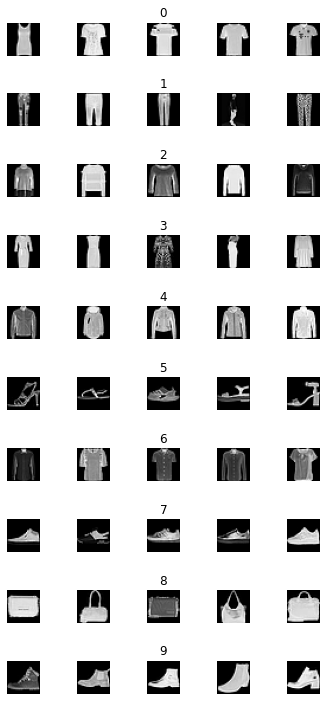

In [185]:
num_of_samples = []
cols = 5; 
num_classes = 10; 

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()

for j in range(num_classes):
  x_selected = X_train[y_train == j]
  
  for i in range(cols):
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))
      

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


Text(0, 0.5, 'Número de imagens')

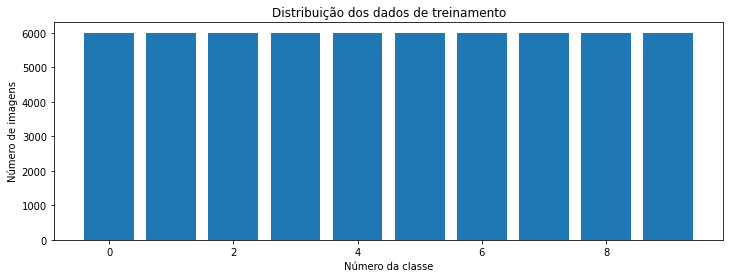

In [186]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribuição dos dados de treinamento")
plt.xlabel("Número da classe")
plt.ylabel("Número de imagens")

## Tratando os dados para o treinamento

In [187]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [188]:
X_train = X_train/255.0
X_test = X_test/255.0

In [189]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

print(X_test.shape)
print(X_train.shape)

(10000, 784)
(60000, 784)


## Treinamento 

### Construíndo a estrutura da rede

In [190]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(400, input_dim=num_pixels, activation='relu'))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_21 (Dense)             (None, 250)               100250    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2510      
Total params: 416,760
Trainable params: 416,760
Non-trainable params: 0
_________________________________________________________________
None


### Treinando 

In [191]:
history =  model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/5
270/270 [==============================] - 4s 12ms/step - loss: 1.1092 - accuracy: 0.7083 - val_loss: 0.3948 - val_accuracy: 0.8568
Epoch 2/5
270/270 [==============================] - 3s 11ms/step - loss: 0.4003 - accuracy: 0.8562 - val_loss: 0.4216 - val_accuracy: 0.8557
Epoch 3/5
270/270 [==============================] - 3s 11ms/step - loss: 0.3535 - accuracy: 0.8733 - val_loss: 0.3718 - val_accuracy: 0.8670
Epoch 4/5
270/270 [==============================] - 3s 11ms/step - loss: 0.3324 - accuracy: 0.8803 - val_loss: 0.3581 - val_accuracy: 0.8725
Epoch 5/5
270/270 [==============================] - 3s 11ms/step - loss: 0.3253 - accuracy: 0.8805 - val_loss: 0.3874 - val_accuracy: 0.8582


### Avaliação do treinamento 

Text(0.5, 0, 'Epoch')

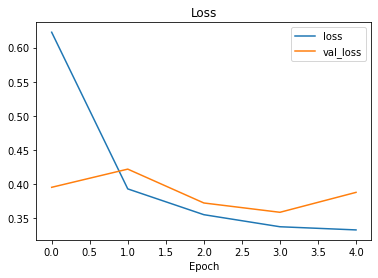

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

In [193]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:',score[0])
print('Test accuracy:',score[1])

<class 'list'>
Test score: 0.4008863866329193
Test accuracy: 0.8492000102996826
